In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [26]:
from collections import defaultdict
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

from dataset import load_dataset_from_path
from datasets import load_dataset, Dataset

In [19]:
ROOT_DATA_DIR = "../data/Arithmetic/"
RAW_DATA_PATH = os.path.join(ROOT_DATA_DIR, "arithmetic_dataset.csv")
df = load_dataset_from_path(RAW_DATA_PATH)
df = df.drop_duplicates(["query"])
df

,query_no_mod,query,prior_answer,context,ctx_answer,query_depth,ctx_depth
0,(((6 ** 4) - 2) ** 4) ** 9,((((6 ** 4) - 2) ** 4) ** 9) (mod 10),6,2=4,6,4,0
1,(7 * 8) * 1,((7 * 8) * 1) (mod 10),6,7=6,8,2,0
2,((8 + 0) ** 4) - 7,(((8 + 0) ** 4) - 7) (mod 10),9,7=0,6,3,0
3,(((3 * 5) + 9) ** 1) - 2,((((3 * 5) + 9) ** 1) - 2) (mod 10),2,(((3 * 5) + 9) ** 1) - 2=4,4,4,4
4,((8 + 5) - 8) * 1,(((8 + 5) - 8) * 1) (mod 10),5,8=9,5,3,0
...,...,...,...,...,...,...,...
9995,((5 ** 3) * 5) * 7,(((5 ** 3) * 5) * 7) (mod 10),5,7=9,5,3,0
9996,(1 - 4) - 0,((1 - 4) - 0) (mod 10),7,(1 - 4)=3,3,2,1
9997,(6 ** 6) + 6,((6 ** 6) + 6) (mod 10),2,(6 ** 6) + 6=5,5,2,2
9998,((8 - 4) + 8) * 0,(((8 - 4) + 8) * 0) (mod 10),0,4=5,0,3,0


### EDA

In [7]:
df.value_counts(["query"])

query                               
(9 - 9) (mod 10)                        1
((((0 * 0) * 0) - 8) - 7) (mod 10)      1
((((0 * 0) * 1) ** 3) + 8) (mod 10)     1
((((0 * 0) * 8) * 6) + 2) (mod 10)      1
((((0 * 0) * 9) + 5) ** 2) (mod 10)     1
                                       ..
((((0 * 3) + 0) ** 2) ** 0) (mod 10)    1
((((0 * 3) + 0) + 3) + 0) (mod 10)      1
((((0 * 3) + 1) - 1) * 2) (mod 10)      1
((((0 * 3) + 4) - 9) ** 4) (mod 10)     1
((((0 * 3) - 0) * 0) ** 2) (mod 10)     1
Name: count, Length: 10000, dtype: int64

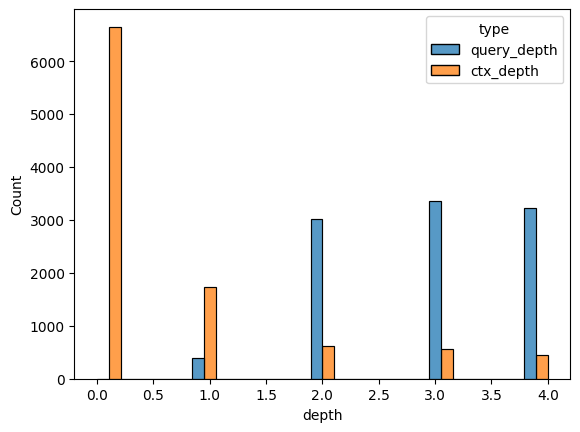

In [28]:
def plot_depth_dist(df):
    fig, ax = plt.subplots()
    sns.histplot(
        data=df.melt(id_vars="query", value_vars=["query_depth", "ctx_depth"], var_name="type", value_name="depth"), 
        x="depth",
        multiple='dodge',
        hue="type",
        ax=ax
    )
plot_depth_dist(df)
# Should we try to even this out more?

### Train/val/test split

In [22]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)
train_df.info(), val_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 6721 to 2770
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   query_no_mod  6400 non-null   object
 1   query         6400 non-null   object
 2   prior_answer  6400 non-null   int64 
 3   context       6400 non-null   object
 4   ctx_answer    6400 non-null   int64 
 5   query_depth   6400 non-null   int64 
 6   ctx_depth     6400 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 400.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 8432 to 629
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   query_no_mod  1600 non-null   object
 1   query         1600 non-null   object
 2   prior_answer  1600 non-null   int64 
 3   context       1600 non-null   object
 4   ctx_answer    1600 non-null   int64 
 5   query_depth   1600 non-null   int64 
 6   ctx_depth     1600 non

(None, None, None)

In [30]:
train_df.to_csv(os.path.join(ROOT_DATA_DIR, "train.csv"), index=False)
val_df.to_csv(os.path.join(ROOT_DATA_DIR, "val.csv"), index=False)
test_df.to_csv(os.path.join(ROOT_DATA_DIR, "test.csv"), index=False)

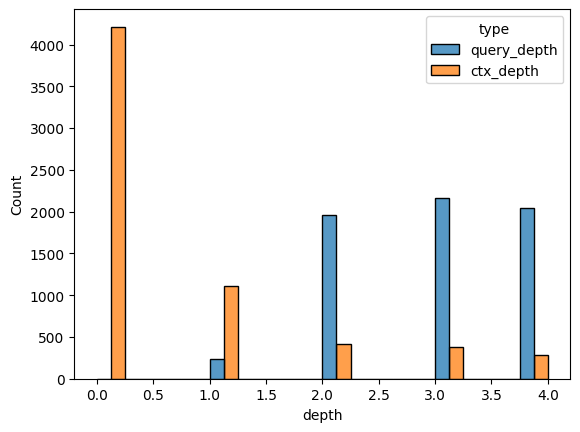

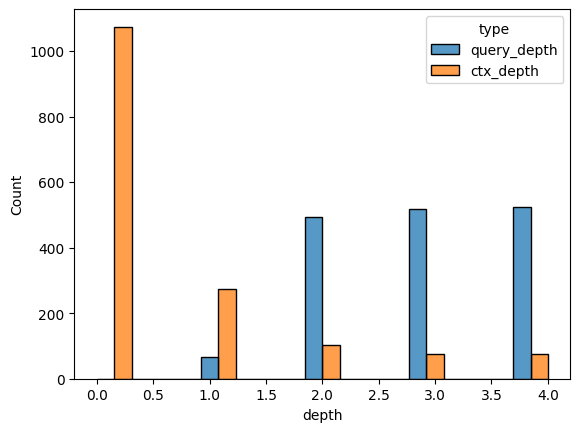

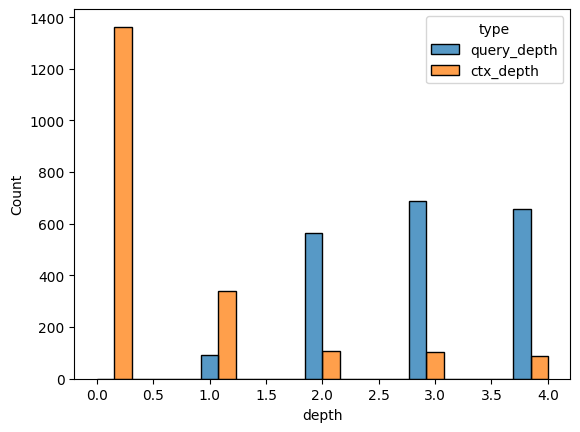

In [29]:
plot_depth_dist(train_df)
plot_depth_dist(val_df)
plot_depth_dist(test_df)
